In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/titanic_toy_dataset.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [8]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [9]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()
mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [11]:
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)

In [14]:
x_train.sample(5)

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
318,31.0,164.8667,2,31.0,164.866700,31.0,164.8667
722,34.0,13.0000,0,34.0,13.000000,34.0,13.0000
373,22.0,NaN,0,22.0,32.617597,22.0,14.4583
636,32.0,7.9250,0,32.0,7.925000,32.0,7.9250
75,25.0,7.6500,0,25.0,7.650000,25.0,7.6500


## mean/median imputation tend to reduce the variance of the features so we have to make sure that there are no drastic differences

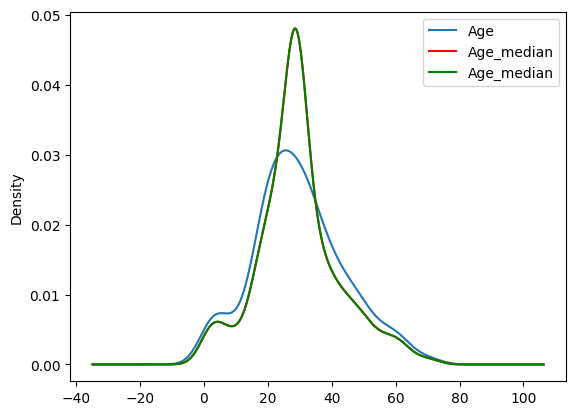

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

x_train['Age'].plot(kind = 'kde', ax = ax)
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')
x_train['Age_median'].plot(kind='kde', ax=ax, color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## above clearly we can see differences in imputed and regular column

In [17]:
x_train.cov()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,66.665205,204.349513,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,2448.197914,57.957599,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,16.385048,-5.112563,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,52.788341,161.812625,51.358000
Fare_mean,66.665205,2448.197914,16.385048,52.788341,2324.238526,55.023037,2324.238526
Age_median,204.349513,57.957599,-5.112563,161.812625,55.023037,161.989566,53.553455
Fare_median,64.858859,2448.197914,16.476305,51.358000,2324.238526,53.553455,2340.091022


## covariance is implemented as to check the covariance between the cols before and after imputation

# so far we have used pandas for imputing but we can also use Sklearn for the same

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

## created a col transformer for ease

In [21]:
trf=ColumnTransformer([
    ('imputer1' , imputer1, ['Age']),
    ('imputer2' , imputer2, ['Fare']),
], remainder = 'passthrough')

In [22]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [24]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [25]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])